In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Generate dataset
trX = np.linspace(-1, 1, 101)
#trX =   (trX - np.min(trX)) / (np.max(trX) - np.min(trX))
#print(trX)

In [3]:
noise = np.random.randn(*trX.shape) * 0.33

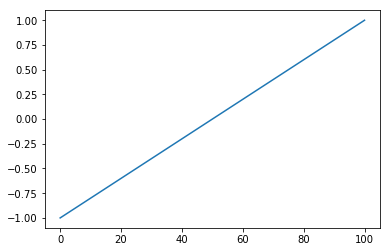

In [4]:
plt.plot(trX)

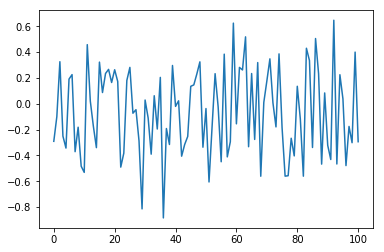

In [5]:
plt.plot(noise)

In [6]:
trY = 2 * trX + noise# create a y value which is approximately linear but with some random noise

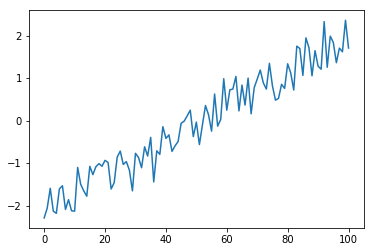

In [7]:
plt.plot(trY)

In [8]:
noise

array([-0.29120584, -0.0997766 ,  0.32545516, -0.25070333, -0.34352798,
        0.19066643,  0.22541423, -0.37144883, -0.18188584, -0.48401747,
       -0.53176198,  0.45765908,  0.0201797 , -0.17428885, -0.34015154,
        0.32238617,  0.08672412,  0.23430551,  0.26601499,  0.16454753,
        0.2632254 ,  0.17267916, -0.49095835, -0.3830936 ,  0.18039413,
        0.28143827, -0.07343546, -0.04619725, -0.28734219, -0.81453286,
        0.0286951 , -0.11003954, -0.39057916,  0.06190652, -0.19577241,
        0.20400498, -0.88440529, -0.19199108, -0.31568641,  0.2963077 ,
       -0.02061178,  0.0226629 , -0.40622775, -0.31571395, -0.25361465,
        0.13497136,  0.14575505,  0.23084361,  0.32435698, -0.33680717,
       -0.03732932, -0.6060014 , -0.18084382,  0.23279812, -0.02401927,
       -0.44935689,  0.38398199, -0.41175338, -0.29444302,  0.62429846,
       -0.15566939,  0.2811939 ,  0.26175158,  0.5180317 , -0.33296664,
        0.23390723, -0.27663366,  0.31880528, -0.56152999,  0.01

In [9]:
model = Sequential()
model.add(Dense(input_dim=1, output_dim=1, init='uniform',activation='linear'))
model.compile(optimizer='sgd', loss='mse')

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="linear", units=1, kernel_initializer="uniform")`
  


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Print initial weights
weights = model.layers[0].get_weights()
print(weights)
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))

[array([[-0.0248201]], dtype=float32), array([ 0.], dtype=float32)]
Linear regression model is initialized with weight w: -0.02, b: 0.00


In [12]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)

In [13]:
model.fit(trX,trY,nb_epoch=100,verbose=1,callbacks=[tensorboard])

/root/anaconda3/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
101/101 [==============================] - 0s 2ms/step - loss: 1.5023
Epoch 2/100
101/101 [==============================] - 0s 62us/step - loss: 1.4214
Epoch 3/100
101/101 [==============================] - 0s 73us/step - loss: 1.3511
Epoch 4/100
101/101 [==============================] - 0s 67us/step - loss: 1.2836
Epoch 5/100
101/101 [==============================] - 0s 103us/step - loss: 1.2140
Epoch 6/100
101/101 [==============================] - 0s 76us/step - loss: 1.1564
Epoch 7/100
101/101 [==============================] - 0s 73us/step - loss: 1.1036
Epoch 8/100
101/101 [==============================] - 0s 104us/step - loss: 1.0506
Epoch 9/100
101/101 [==============================] - 0s 72us/step - loss: 1.0029
Epoch 10/100
101/101 [==============================] - 0s 136us/step - loss: 0.9632
Epoch 11/100
101/101 [==============================] - 0s 82us/step - loss: 0.9184
Epoch 12/100
101/101 [==============================] - 0s 89us/step - loss: 0.8739

101/101 [==============================] - 0s 91us/step - loss: 0.1187
Epoch 99/100
101/101 [==============================] - 0s 79us/step - loss: 0.1183
Epoch 100/100
101/101 [==============================] - 0s 76us/step - loss: 0.1181


In [14]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]
print('Linear regression model is trained with weight w: %.2f, b: %.2f' % (w, b))

Linear regression model is trained with weight w: 1.87, b: -0.08


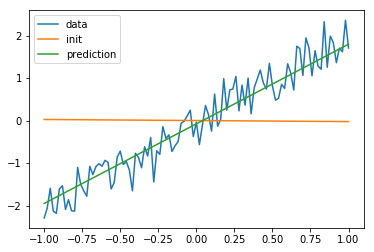

In [15]:
plt.plot(trX, trY, label='data')
plt.plot(trX, w_init*trX + b_init, label='init')
plt.plot(trX, w*trX + b, label='prediction')
plt.legend()
plt.show()

In [16]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

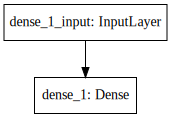

In [17]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [18]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes='True') # to save above
